# PDA Project Dec 2018 
by Colm Doherty


# 1. Researching an existing dataset

As a recreational sailor I'm very interested in weather data. I searched for & found a good dataset source on Data.gov.ie, compiled by Met Eireann and detailing monthly rainfall at the Dun Laoghaire weather station, 1997-2018. It's available at: https://cli.fusio.net/cli/climate_data/webdata/mly9223.csv
        

## Import Libraries

In [2]:
# Import pandas etc.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# check versions of all libraries
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.5.final.0
python-bits: 64
OS: Darwin
OS-release: 15.6.0
machine: x86_64
processor: i386
byteorder: little
LC_ALL: None
LANG: en_IE.UTF-8
LOCALE: en_IE.UTF-8

pandas: 0.23.0
pytest: 3.5.1
pip: 10.0.1
setuptools: 39.1.0
Cython: 0.28.2
numpy: 1.14.3
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 6.4.0
sphinx: 1.7.4
patsy: 0.5.0
dateutil: 2.7.3
pytz: 2018.4
blosc: None
bottleneck: 1.2.1
tables: 3.4.3
numexpr: 2.6.5
feather: None
matplotlib: 2.2.2
openpyxl: 2.5.3
xlrd: 1.1.0
xlwt: 1.2.0
xlsxwriter: 1.0.4
lxml: 4.2.1
bs4: 4.6.0
html5lib: 1.0.1
sqlalchemy: 1.2.7
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


In [3]:
! ls


Data_Licence.pdf           MET9223.csv
Data_Licence.txt           PDA Project Dec 2018.ipynb
Hello.py                   PDA project Dec.pdf
Indicator.txt              README.md
LICENSE


## Import Dataset

In [3]:
# Load the dataset
import csv as df
df = pd.read_csv("MET9223.csv", skiprows=13) 

The four variables measured are: 
"rain":  -  Precipitation Amount (mm), 
"gdf":   -  Greatest daily fall (mm), 
"rd":    -  Number of rain days (0.2mm or more), 
"wd":    -  Number of wet days (1.0 mm or more)	


In [4]:
df

,year,month,rain,gdf,rd,wd
0,1997,8,91.8,17.4,18,16
1,1997,9,11.5,2.9,12,4
2,1997,10,70.7,20.7,14,10
3,1997,11,187.4,54.6,22,17
4,1997,12,84.4,21.7,14,12
5,1998,1,109.4,16.5,19,15
6,1998,2,8.4,2.9,8,4
7,1998,3,61.3,10.3,15,11
8,1998,4,136.5,39,26,16
9,1998,5,27.7,12.5,11,5


We can see that 'rain' and 'gdf' are floating point values,'rd'and 'wd' are positive Integers. Only the 'rain' variable shows a full 253 observations. The other 3 columns are missing some values.

In [5]:
# what does the data distribution look like?
df.describe()

,year,month,rain
count,253.000000,253.000000,253.000000
mean,2007.624506,6.505929,66.385375
std,6.110532,3.453340,40.455267
min,1997.000000,1.000000,1.200000
25%,2002.000000,4.000000,36.600000
50%,2008.000000,7.000000,57.500000
75%,2013.000000,9.000000,88.300000
max,2018.000000,12.000000,207.000000


In [47]:
# ok, lets ignore the Year & Month columns
df1 = df.iloc[:,2:4]
df1.describe()

,rain
count,253.000000
mean,66.385375
std,40.455267
min,1.200000
25%,36.600000
50%,57.500000
75%,88.300000
max,207.000000


only the 'rain' column data is summarised, because the other three variables are of dtype 'object'

In [34]:
df.dtypes

year       int64
month      int64
rain     float64
gdf       object
rd        object
wd        object
dtype: object

In [35]:
pd.to_numeric

<function pandas.core.tools.numeric.to_numeric(arg, errors='raise', downcast=None)>

In [36]:
# note gdf,rd,wd are all objects. Convert them to float64. 
# (https://stackoverflow.com/questions/28277137/how-to-convert-datatypeobject-to-float64-in-python)
df.infer_objects()

,year,month,rain,gdf,rd,wd
0,1997,8,91.8,17.4,18,16
1,1997,9,11.5,2.9,12,4
2,1997,10,70.7,20.7,14,10
3,1997,11,187.4,54.6,22,17
4,1997,12,84.4,21.7,14,12
5,1998,1,109.4,16.5,19,15
6,1998,2,8.4,2.9,8,4
7,1998,3,61.3,10.3,15,11
8,1998,4,136.5,39,26,16
9,1998,5,27.7,12.5,11,5


In [37]:
df.dtypes

year       int64
month      int64
rain     float64
gdf       object
rd        object
wd        object
dtype: object

In [42]:
# see: https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer

# identify & ignore all 'NaN' values with boolean indexing:
print(df[df['gdf'].isnull()])

Empty DataFrame
Columns: [year, month, rain, gdf, rd, wd]
Index: []


In [13]:
# remove all NaN values use to_numeric with parameetr errors='coerce' - it replace non numeric to NaNs:
df['gdf'] = pd.to_numeric(df['gdf'], errors='coerce')

# to remove all rows with NaNs in column, use dropna:
df = df.dropna(subset=['gdf'])

# Finally convert values to ints:
df['gdf'] = df['gdf'].astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
df1=df.iloc[:,4]

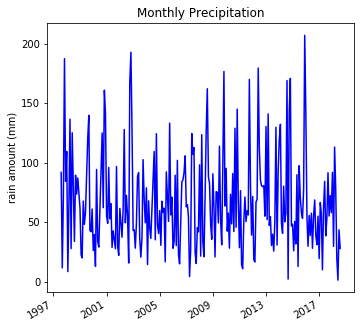

In [18]:
# plot monthly rain data: 
# https://stackoverflow.com/questions/52975561/how-to-combine-month-and-year-columns-of-data-frame-to-form-time-series-data

ax = df.set_index(pd.to_datetime(df[['year','month']].assign(day=1)))['rain']\
       .plot(color='b', figsize=(5.5,5.5), title='Monthly Precipitation')
_ = ax.set_xlabel('')
_ = ax.set_ylabel('rain amount (mm)')           

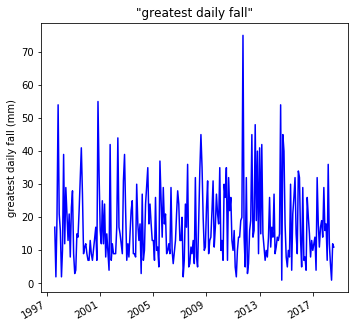

In [19]:
# plot monthly "greatest daily fall" data: 
# https://stackoverflow.com/questions/52975561/how-to-combine-month-and-year-columns-of-data-frame-to-form-time-series-data

ax = df.set_index(pd.to_datetime(df[['year','month']].assign(day=1)))['gdf']\
       .plot(color='b', figsize=(5.5,5.5), title='"greatest daily fall"')
_ = ax.set_xlabel('')
_ = ax.set_ylabel('greatest daily fall (mm)')  


## Calculate the descriptive statistics of the variables in the dataset

In [20]:
# now lets get descriptive statistics for all four variables:
df1 = df[['rain','gdf','rd','wd']]
df1.describe()

,rain,gdf
count,244.000000,244.000000
mean,66.967213,17.647541
std,40.840552,11.742030
min,1.200000,1.000000
25%,37.175000,9.000000
50%,57.750000,14.000000
75%,89.400000,24.000000
max,207.000000,75.000000


In [21]:
# lets select & plot the rain variable
dfr = df[['rain']]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


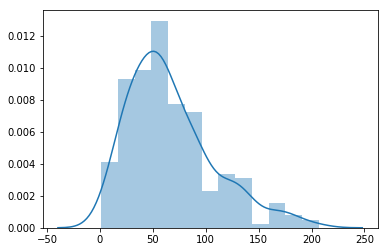

In [22]:
sns.distplot(dfr);

So values for monthly rainfall (mm) over 253 months are distributed to a (skewed) Normal distribution with a long tail of higher values

In [23]:
# select gdf
dfg = df[['gdf']]
dfg

,gdf
0,17
1,2
2,20
3,54
4,21
5,16
6,2
7,10
8,39
9,12


In [51]:
df = df.convert_objects(convert_numeric=True)
df.dtypes


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


year       int64
month      int64
rain     float64
gdf      float64
rd       float64
wd       float64
dtype: object

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


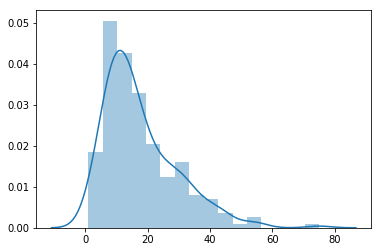

In [26]:
sns.distplot(dfg);

AS with the 'rain variable, values for 'Greatest Daily Fall (gdf) are distributed to a (skewed) Normal distribution with a long tail of higher values

In [58]:
# select rd. nb. Variables 'rd' and 'wd' should be Integers, not float64 dtypes!
dfr = df.iloc[:,4]

dfr

0      18.0
1      12.0
2      14.0
3      22.0
4      14.0
5      19.0
6       8.0
7      15.0
8      26.0
9      11.0
10      NaN
11      NaN
12      9.0
13     18.0
14     23.0
15     19.0
16     23.0
17     22.0
18     15.0
19     13.0
20     19.0
21     14.0
22     15.0
23      NaN
24     15.0
25     20.0
26     13.0
27     16.0
28     20.0
29     14.0
       ... 
223    14.0
224    13.0
225    13.0
226    16.0
227    17.0
228    15.0
229    16.0
230     8.0
231    13.0
232    15.0
233    13.0
234    16.0
235    16.0
236     7.0
237    16.0
238    18.0
239    12.0
240    15.0
241    23.0
242    15.0
243    15.0
244    15.0
245    21.0
246    15.0
247    22.0
248    21.0
249    10.0
250     2.0
251     9.0
252    14.0
Name: rd, Length: 253, dtype: float64

In [60]:
dfr.describe()

count    247.000000
mean      15.777328
std        4.752728
min        2.000000
25%       13.000000
50%       16.000000
75%       19.000000
max       30.000000
Name: rd, dtype: float64

In [66]:
# For identifying NaN values use boolean indexing:

print(dfr[dfr[:].isnull()])

10   NaN
11   NaN
23   NaN
36   NaN
47   NaN
48   NaN
Name: rd, dtype: float64


In [77]:
# remove all NaN values (ref: https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan)
dfr = dfr[pd.notnull(df['rd'])]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


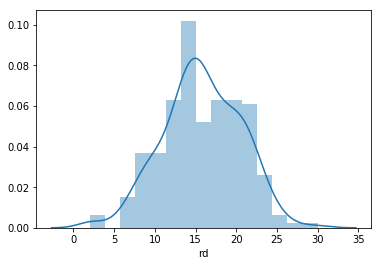

In [76]:
sns.distplot(dfr);

So the values for 'Number of rain days (0.2mm or more)' are also distributed to a fairly Normal distribution with an extra bump at around +1 SD (values of 20.5)